In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout

##Data Pre-Processing

In [ ]:
dataset_path = "https://storage.googleapis.com/io-vertex-codelab/auto-mpg.csv"

In [ ]:
data = pd.read_csv(dataset_path)

In [ ]:
data.shape

(398, 9)

In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [ ]:
col_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

In [ ]:
data.columns = col_names

In [ ]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


####Handling Horsepower '?' values

In [ ]:
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
data = data.replace('?', np.nan)

In [ ]:
data.isnull().values.any()

True

In [ ]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [ ]:
data['horsepower'] = pd.to_numeric(data['horsepower'])

In [ ]:
data.fillna(data.mean(), inplace=True)

In [ ]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


####Handling Car Name values and 

In [ ]:
# len(data['car_name'].unique())

In [ ]:
# data['car_name_'] = data['car_name'].apply(lambda x: re.search(r'^\w+', x).group(0))
data = data.drop('car_name', axis=1)

In [ ]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [ ]:
df = pd.get_dummies(data['origin'], prefix='origin')

In [ ]:
data = pd.concat([data,df], axis = 1)
data.drop('origin', axis =1, inplace = True)
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0,0


In [ ]:
# make_typo_correction = {
#         'vw': 'volkswagen',
#         'chevy': 'chevrolet',
#         'maxda': 'mazda',
#         'vokswagen': 'volkswagen',
#         'toyouta': 'toyota',
#         'chevroelt': 'chevrolet'
#     }
# data['car_name_'] = data['car_name_'].replace(make_typo_correction)

In [ ]:
# len(data['car_name_'].unique())

In [ ]:
# le = LabelEncoder()
# car_name_encoded = le.fit_transform(data['car_name_'])

In [ ]:
# np.unique(car_name_encoded)

In [ ]:
# data['car_name_'] = car_name_encoded

###Correlation 

In [ ]:
data_corr = data.corr()

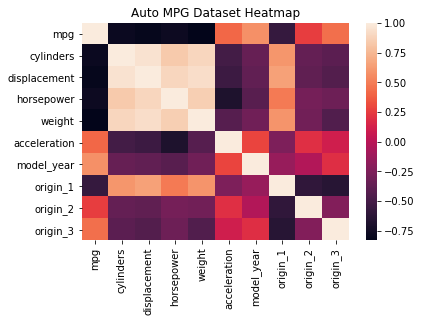

In [ ]:
sns.heatmap(data=data_corr)
plt.title("Auto MPG Dataset Heatmap")
plt.show()

###Univariate distribution of data

In [ ]:
data['mpg']=np.log1p(data['mpg'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


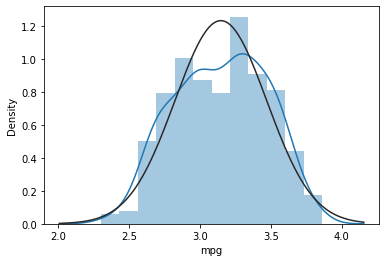

In [ ]:
sns.distplot(data['mpg'], fit=norm)

In [ ]:
(mu, sigma)=norm.fit(data['mpg'])
print(mu, sigma)

3.1478302770344047 0.32375928015327066


##Data Distribution

In [ ]:
X=data.drop(['mpg'], axis=1)
Y=data['mpg']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


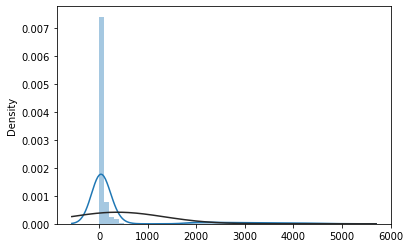

In [ ]:
sns.distplot(X, fit=norm)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


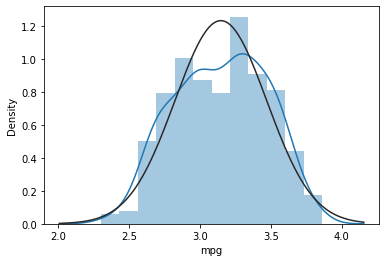

In [ ]:
sns.distplot(Y, fit=norm)

In [ ]:
X= (X - X.mean()) /X.std()

In [ ]:
Y= (Y - Y.mean()) /Y.std()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


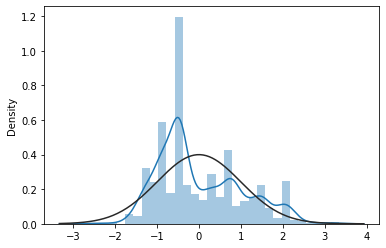

In [ ]:
sns.distplot(X, fit=norm)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


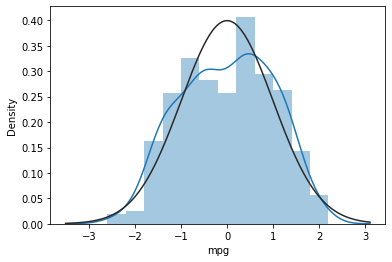

In [ ]:
sns.distplot(Y, fit=norm)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True)

# X_train=scaler.fit_transform(X_train)
# X_test=scaler.transform(X_test)

In [ ]:
print(X.shape)
print(Y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(398, 9)
(398,)
(318, 9)
(318,)
(80, 9)
(80,)


In [ ]:
data.corr().mpg

mpg             1.000000
cylinders      -0.824425
displacement   -0.852288
horsepower     -0.822894
weight         -0.874384
acceleration    0.444969
model_year      0.576752
origin_1       -0.569336
origin_2        0.270954
origin_3        0.432173
Name: mpg, dtype: float64

##Model

In [ ]:
model = Sequential([
                    Dense(64, input_shape=(X_train.shape[1],), activation = 'relu'),
                    Dropout(0.6),
                    Dense(48, activation = 'relu'),
                    Dropout(0.6),
                    Dense(1,activation = 'linear')
])

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

In [ ]:
model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics= ['mse'])

In [ ]:
history = model.fit(X_train, y_train, epochs=1000, validation_data = (X_test, y_test))

Epoch 1/1000
10/10 [==============================] - 2s 52ms/step - loss: 1.0282 - mse: 1.0282 - val_loss: 0.3798 - val_mse: 0.3798
Epoch 2/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.9147 - mse: 0.9147 - val_loss: 0.2744 - val_mse: 0.2744
Epoch 3/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.7819 - mse: 0.7819 - val_loss: 0.2523 - val_mse: 0.2523
Epoch 4/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.7567 - mse: 0.7567 - val_loss: 0.2091 - val_mse: 0.2091
Epoch 5/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.5746 - mse: 0.5746 - val_loss: 0.2025 - val_mse: 0.2025
Epoch 6/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.6070 - mse: 0.6070 - val_loss: 0.1987 - val_mse: 0.1987
Epoch 7/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.5456 - mse: 0.5456 - val_loss: 0.1932 - val_mse: 0.1932
Epoch 8/1000
10/10 [==============================] - 0s 9ms/step - loss:

###Model Evaluation

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


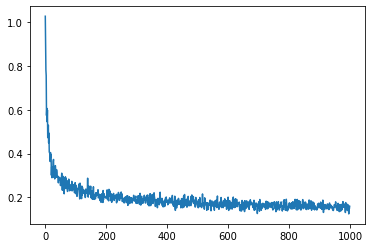

In [ ]:
plt.plot(history.history['loss'])

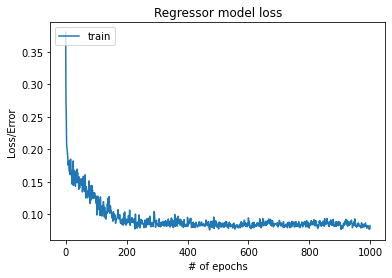

In [ ]:
plt.plot(history.history['val_loss'])
plt.ylabel("Loss/Error")
plt.xlabel("# of epochs")
plt.title("Regressor model loss")
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [ ]:
X.describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,-5.065741e-16,-8.256935e-17,-8.312725e-16,-9.637740e-17,5.479704e-15,-8.022617e-16,2.203709e-16,-4.379523e-17,5.740801e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.443132e+00,-1.202897e+00,-1.530645e+00,-1.602926e+00,-2.744360e+00,-1.625381e+00,-1.291101e+00,-4.613875e-01,-4.970178e-01
25%,-8.552441e-01,-8.552414e-01,-7.452878e-01,-8.817168e-01,-6.320838e-01,-8.140493e-01,-1.291101e+00,-4.613875e-01,-4.970178e-01
50%,-8.552441e-01,-4.308617e-01,-2.478950e-01,-1.971143e-01,-2.469113e-02,-2.718028e-03,7.725866e-01,-4.613875e-01,-4.970178e-01
75%,1.496308e+00,6.576602e-01,5.374620e-01,7.528861e-01,5.827015e-01,8.086132e-01,7.725866e-01,-4.613875e-01,-4.970178e-01
max,1.496308e+00,2.508627e+00,3.286212e+00,2.561961e+00,3.347698e+00,1.619944e+00,7.725866e-01,2.161930e+00,2.006945e+00


In [ ]:
print("\n\nNeural Network Regression model metrics:\n")
print("MSE = {0:.4f}, MAE = {1:.4f}\n\n".format(mse, mae))



Neural Network Regression model metrics:

MSE = 0.0830, MAE = 0.2193




In [ ]:
X_sample = [[1,2,3,2,-2,-1,-2,-1,0]]
X_sample = np.array(X_sample)

In [ ]:
X_sample[0]

array([ 1,  2,  3,  2, -2, -1, -2, -1,  0])

In [ ]:
y_sample_pred = model.predict(X_sample)

In [ ]:
y_sample_pred

array([[-0.866225]], dtype=float32)